In [1]:
import pandas as pd
import os
import gc
import time
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Proj, transform
pd.set_option('mode.chained_assignment', None)

## Read Data

In [2]:
df = pd.read_pickle('C:/YimingXu/GPS_Data_Study/Data_DAU_20.pkl')

In [8]:
df

,GRAVYREGISTRATIONID,GEOHASHLATITUDE,GEOHASHLONGITUDE,GEOHASH9,TIMESTAMP_EPOCH_MILLISECOND,TIMEZONE,FORENSICFLAG,time,LAT_EPSG_3857,LON_EPSG_3857
31974,0019523f-9797-3872-ba3f-1bf87bdfff33,38.288748,-122.691557,9qbcb468p,1571184600000,America/Los_Angeles,557056,2019-10-15 17:10:00,4.620297e+06,-1.365796e+07
31977,0019523f-9797-3872-ba3f-1bf87bdfff33,38.440024,-122.721469,9qbdxmucq,1571191620000,America/Los_Angeles,32768,2019-10-15 19:07:00,4.641774e+06,-1.366129e+07
31980,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346126,-122.710568,9qbdpssyk,1571192340000,America/Los_Angeles,557056,2019-10-15 19:19:00,4.628438e+06,-1.366008e+07
31983,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346340,-122.710311,9qbdpstpd,1571192520000,America/Los_Angeles,557056,2019-10-15 19:22:00,4.628468e+06,-1.366005e+07
31986,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346211,-122.710697,9qbdpssyc,1571196360000,America/Los_Angeles,557056,2019-10-15 20:26:00,4.628450e+06,-1.366009e+07
...,...,...,...,...,...,...,...,...,...,...
100906515,50f2e25b-fcf2-46a5-9c8a-25b87427ba40,38.747556,-123.517677,9qbhmmc0v,1573681740000,America/Los_Angeles,32768,2019-11-13 13:49:00,4.685575e+06,-1.374992e+07
100906516,50f2e25b-fcf2-46a5-9c8a-25b87427ba40,38.747556,-123.517634,9qbhmmc0y,1573681800000,America/Los_Angeles,32768,2019-11-13 13:50:00,4.685575e+06,-1.374992e+07
100906517,50f2e25b-fcf2-46a5-9c8a-25b87427ba40,38.747599,-123.517720,9qbhmmc1h,1573683600000,America/Los_Angeles,32768,2019-11-13 14:20:00,4.685582e+06,-1.374993e+07
100906518,50f2e25b-fcf2-46a5-9c8a-25b87427ba40,38.747599,-123.517720,9qbhmmc1h,1573685040000,America/Los_Angeles,32768,2019-11-13 14:44:00,4.685582e+06,-1.374993e+07


## Activity identification for a selected user

In [9]:
user_id = '0019523f-9797-3872-ba3f-1bf87bdfff33'
myuser = df[df.GRAVYREGISTRATIONID == user_id]
myuser.sort_values(by='TIMESTAMP_EPOCH_MILLISECOND',inplace=True)
myuser

,GRAVYREGISTRATIONID,GEOHASHLATITUDE,GEOHASHLONGITUDE,GEOHASH9,TIMESTAMP_EPOCH_MILLISECOND,TIMEZONE,FORENSICFLAG,time,LAT_EPSG_3857,LON_EPSG_3857
31974,0019523f-9797-3872-ba3f-1bf87bdfff33,38.288748,-122.691557,9qbcb468p,1571184600000,America/Los_Angeles,557056,2019-10-15 17:10:00,4.620297e+06,-1.365796e+07
31977,0019523f-9797-3872-ba3f-1bf87bdfff33,38.440024,-122.721469,9qbdxmucq,1571191620000,America/Los_Angeles,32768,2019-10-15 19:07:00,4.641774e+06,-1.366129e+07
31980,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346126,-122.710568,9qbdpssyk,1571192340000,America/Los_Angeles,557056,2019-10-15 19:19:00,4.628438e+06,-1.366008e+07
31983,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346340,-122.710311,9qbdpstpd,1571192520000,America/Los_Angeles,557056,2019-10-15 19:22:00,4.628468e+06,-1.366005e+07
31986,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346211,-122.710697,9qbdpssyc,1571196360000,America/Los_Angeles,557056,2019-10-15 20:26:00,4.628450e+06,-1.366009e+07
...,...,...,...,...,...,...,...,...,...,...
32628,0019523f-9797-3872-ba3f-1bf87bdfff33,38.648636,-122.874677,9qbeggv2s,1573661580000,America/Los_Angeles,1572864,2019-11-13 08:13:00,4.671466e+06,-1.367835e+07
32630,0019523f-9797-3872-ba3f-1bf87bdfff33,38.648636,-122.874677,9qbeggv2s,1573663020000,America/Los_Angeles,295168,2019-11-13 08:37:00,4.671466e+06,-1.367835e+07
32631,0019523f-9797-3872-ba3f-1bf87bdfff33,38.648636,-122.874677,9qbeggv2s,1573673460000,America/Los_Angeles,1572864,2019-11-13 11:31:00,4.671466e+06,-1.367835e+07
32632,0019523f-9797-3872-ba3f-1bf87bdfff33,38.648636,-122.874677,9qbeggv2s,1573675980000,America/Los_Angeles,295168,2019-11-13 12:13:00,4.671466e+06,-1.367835e+07


### Cluster of data points

In [10]:
clu_list = []
d_thre = 500         # distance threshold, in meters, defult = 500 m
t_thre = 1000*60*5   # time threshold, in millisecond , defult = 5 min
cluster = pd.DataFrame()
for i in range(0,myuser.shape[0]):
    if cluster.shape[0]==0:
        cluster = myuser.iloc[[i]]
        continue
    center = [cluster['LAT_EPSG_3857'].mean(),cluster['LON_EPSG_3857'].mean()]
    pin = myuser.iloc[[i]]
    dis = np.sqrt((center[0]-pin['LAT_EPSG_3857'].values)**2+(center[1]-pin['LON_EPSG_3857'].values)**2)

    if dis <= d_thre:
        cluster = pd.concat([cluster,pin])
    else:
        if cluster.shape[0]>1:
            if cluster.iloc[-1,4]-cluster.iloc[0,4]>t_thre: clu_list.append(cluster)
        cluster = pin

In [15]:
clu_list[0]

,GRAVYREGISTRATIONID,GEOHASHLATITUDE,GEOHASHLONGITUDE,GEOHASH9,TIMESTAMP_EPOCH_MILLISECOND,TIMEZONE,FORENSICFLAG,time,LAT_EPSG_3857,LON_EPSG_3857
31980,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346126,-122.710568,9qbdpssyk,1571192340000,America/Los_Angeles,557056,2019-10-15 19:19:00,4.628438e+06,-1.366008e+07
31983,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346340,-122.710311,9qbdpstpd,1571192520000,America/Los_Angeles,557056,2019-10-15 19:22:00,4.628468e+06,-1.366005e+07
31986,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346211,-122.710697,9qbdpssyc,1571196360000,America/Los_Angeles,557056,2019-10-15 20:26:00,4.628450e+06,-1.366009e+07
31989,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346598,-122.711040,9qbdpsu91,1571196660000,America/Los_Angeles,32768,2019-10-15 20:31:00,4.628505e+06,-1.366013e+07


### Activity location: cluster centre

In [16]:
acts = pd.DataFrame()
for cluster in clu_list:
    act = pd.DataFrame(data=[[cluster.iloc[0,0], cluster['GEOHASHLATITUDE'].mean(),
                                   cluster['GEOHASHLONGITUDE'].mean(),cluster.iloc[-1,4],
                                   cluster.iloc[-1,7],cluster['LAT_EPSG_3857'].mean(),
                                   cluster['LON_EPSG_3857'].mean(),]],
                            columns=cluster.columns[[0,1,2,4,7,8,9]])
    acts = pd.concat([acts,act])

In [17]:
acts

,GRAVYREGISTRATIONID,GEOHASHLATITUDE,GEOHASHLONGITUDE,TIMESTAMP_EPOCH_MILLISECOND,time,LAT_EPSG_3857,LON_EPSG_3857
0,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346319,-122.710654,1571196660000,2019-10-15 20:31:00,4.628465e+06,-1.366009e+07
0,0019523f-9797-3872-ba3f-1bf87bdfff33,38.556153,-122.832534,1571243280000,2019-10-16 09:28:00,4.658292e+06,-1.367366e+07
0,0019523f-9797-3872-ba3f-1bf87bdfff33,38.631963,-122.874355,1571249580000,2019-10-16 11:13:00,4.669090e+06,-1.367831e+07
0,0019523f-9797-3872-ba3f-1bf87bdfff33,38.632757,-122.875278,1571274780000,2019-10-16 18:13:00,4.669203e+06,-1.367841e+07
0,0019523f-9797-3872-ba3f-1bf87bdfff33,38.346626,-122.710797,1571282580000,2019-10-16 20:23:00,4.628509e+06,-1.366010e+07
...,...,...,...,...,...,...,...
0,0019523f-9797-3872-ba3f-1bf87bdfff33,38.556110,-122.832448,1572964860000,2019-11-05 06:41:00,4.658286e+06,-1.367365e+07
0,0019523f-9797-3872-ba3f-1bf87bdfff33,38.631684,-122.875835,1572991920000,2019-11-05 14:12:00,4.669050e+06,-1.367848e+07
0,0019523f-9797-3872-ba3f-1bf87bdfff33,38.556039,-122.832448,1573051260000,2019-11-06 06:41:00,4.658276e+06,-1.367365e+07
0,0019523f-9797-3872-ba3f-1bf87bdfff33,38.631759,-122.875309,1573085520000,2019-11-06 16:12:00,4.669061e+06,-1.367842e+07


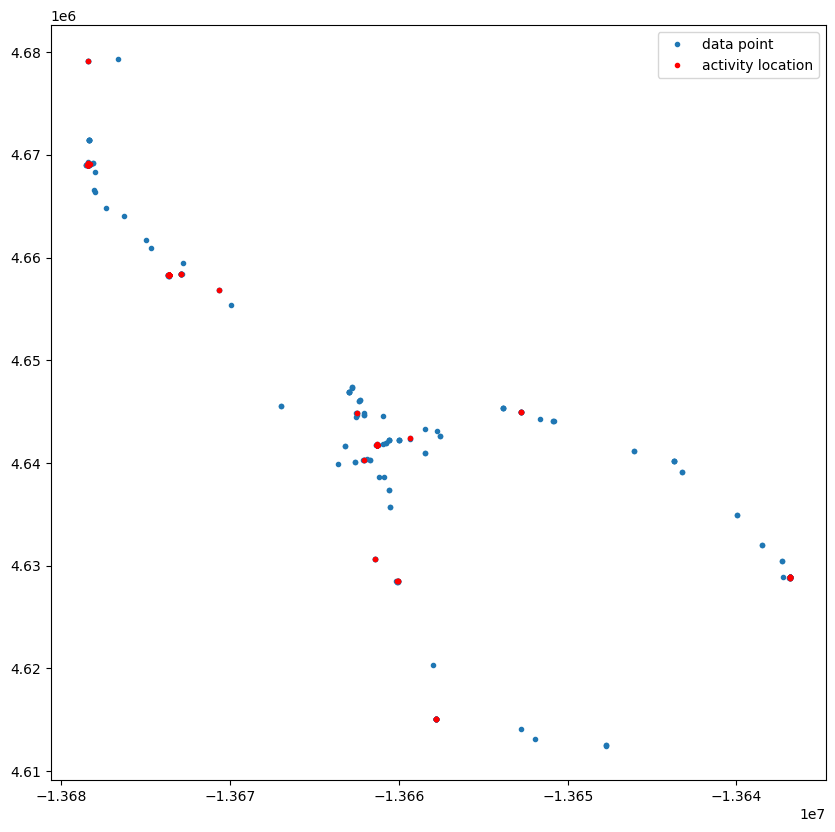

In [19]:
plt.figure(figsize=[10,10],dpi=100)
plt.plot(myuser.LON_EPSG_3857,myuser.LAT_EPSG_3857,'.',zorder=1)
plt.plot(acts.LON_EPSG_3857, acts.LAT_EPSG_3857,'r.',zorder=2)
plt.legend(['data point', 'activity location'])